# OwlViT test

In [7]:
import sys
import os
import torch
from PIL import Image

current_dir = os.getcwd()
# Navigate up one directory to get the correct path
sys.path.insert(0, os.path.abspath(os.path.join(current_dir, "..", "src")))

from detection_module.owlv2 import Owlv2
from detection_module.utils import calculate_iou, show_images


## Image Visualization

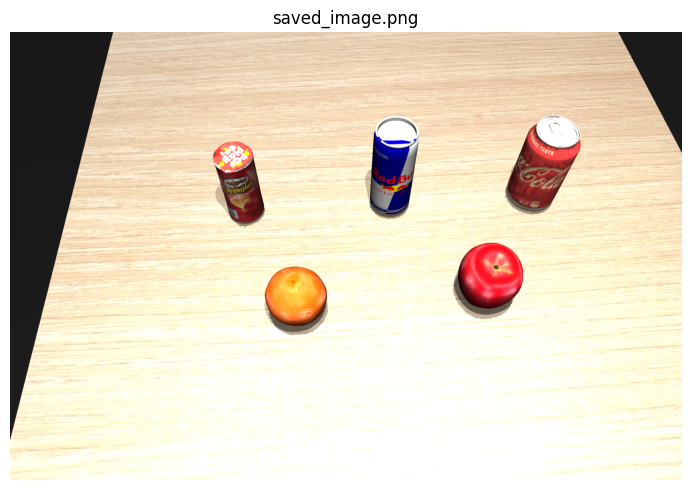

In [25]:
image_dir = "../data/image_sim"
image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
image_paths = sorted(image_paths)
images = [Image.open(img).convert("RGB") for img in image_paths]
titles = [os.path.basename(img_path) for img_path in image_paths]

# Show images using the utility function
show_images(images, titles)

## Owlv2 Inferenece

Let's define sample image dict first

In [29]:
sample = {
        'image': images[0],
        'text': ["a Red Bull can", "a Pringles can", "a Coca-Cola can", "a Monster can", "an orange", "an apple"],
    }

In [30]:
print(sample.values())

dict_values([<PIL.Image.Image image mode=RGB size=2400x1600 at 0x14B6561C0>, ['a Red Bull can', 'a Pringles can', 'a Coca-Cola can', 'a Monster can', 'an orange', 'an apple']])


In [31]:
# load model 
owlvit = Owlv2()
sample['box_threshold'] = 0.3
result = owlvit.detect_objects(**sample)[0]

[[1776  295 2040  639]
 [1258  299 1432  659]
 [ 725  387  909  682]
 [1605  750 1837  989]
 [ 914  836 1133 1049]]


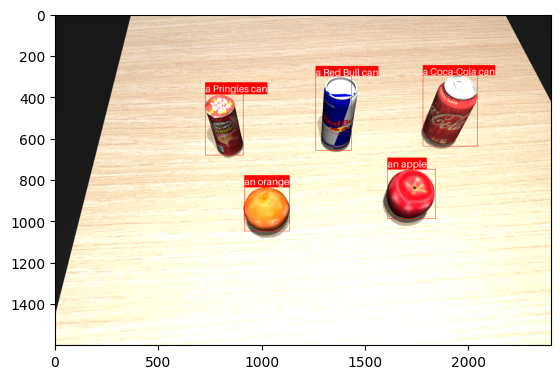

In [39]:
import matplotlib.pyplot as plt
import numpy as np
img = sample['image']
boxes = result['boxes']
labels = [sample['text'][idx] for idx in result['labels'].tolist()]
boxes_list = np.array(result['boxes'].tolist())
boxes_list = boxes_list.astype(int)
print(boxes_list)
img_boxed = owlvit.draw_boxes(img, boxes, labels)
plt.imshow(img)

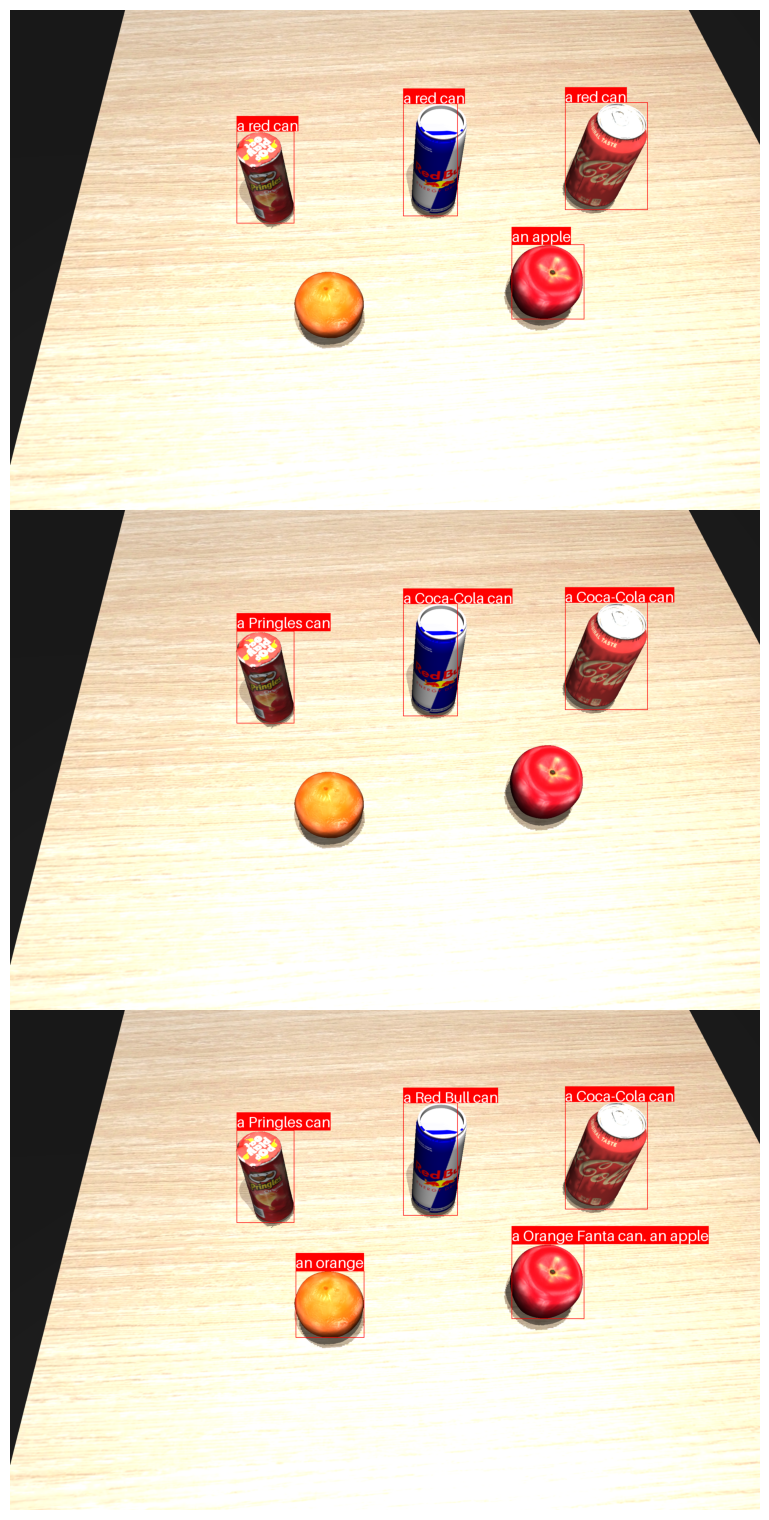

In [12]:
import matplotlib.pyplot as plt

def show_images_with_bboxes(images, detection_results):
    fig, axs = plt.subplots(len(images), 1, figsize=(10, len(images) * 5))
    
    for ax, img, result, sample in zip(axs, images, detection_results, samples.values()):
        img = img.copy()

        boxes = result['boxes']
        labels = [sample['text'][idx] for idx in result['labels'].tolist()]
        img = owlvit.draw_boxes(img, boxes, labels)

        ax.imshow(img)
        ax.axis('off')

    plt.subplots_adjust(hspace=0.1, top=1, bottom=0, left=0, right=1)
    plt.tight_layout(pad=0)
    plt.show()


show_images_with_bboxes(images, detection_results)